In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Set your data directory
train_dir = './Splited_Dataset/train'
test_dir = './Splited_Dataset/test'

# Set up ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
image_size = (224, 224)  # Adjust image size as needed
classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']  # Add your class names
num_classes = len(classes)

In [2]:
train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=True,
    seed=42
)

Found 1036 images belonging to 5 classes.


In [3]:
test_ds = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=True,
    seed=42
)

Found 150 images belonging to 5 classes.


In [4]:
def CountEachClass(dataset):
    # Get the class indices and counts
    class_indices = dataset.class_indices
    class_counts = dataset.classes

    # Convert class indices to class names
    class_names = {v: k for k, v in class_indices.items()}

    # Count the occurrences of each class
    class_counts_dict = {}
    for count in class_counts:
        class_name = class_names[count]
        class_counts_dict[class_name] = class_counts_dict.get(class_name, 0) + 1

    return class_counts_dict

In [5]:
train_img_count = list(CountEachClass(train_ds).values())
test_img_count = list(CountEachClass(test_ds).values())

Text(0, 0.5, 'count')

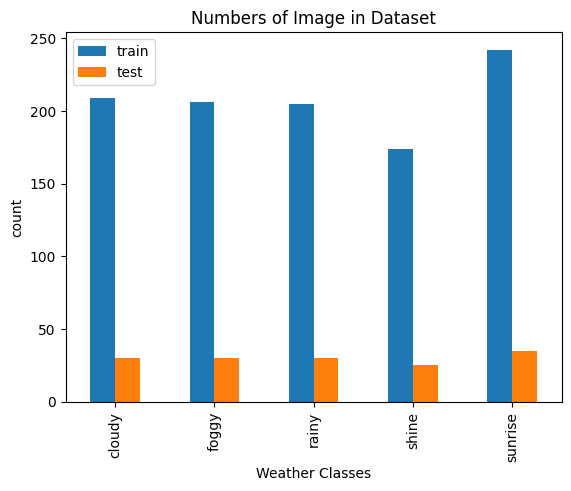

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame({
    "train": train_img_count,
    "test": test_img_count
    },
    index = classes
)

data.plot(kind="bar")
plt.title("Numbers of Image in Dataset")
plt.xlabel("Weather Classes")
plt.ylabel("count")

In [7]:
import numpy as np

def extractLabel(dataset):
    X = []
    Y = []
    for i in range(len(dataset)):
        images, labels = dataset.next()
        X.append(images)
        Y.append(np.argmax(labels, axis=1))  
    X = np.concatenate(X, axis=0)
    Y = np.concatenate(Y, axis=0)
    return(X,Y)

In [8]:
X_train, Y_train = extractLabel(train_ds)
X_test, Y_test = extractLabel(test_ds)

In [9]:
base_model = keras.applications.MobileNetV2(input_shape=(224,224,3),
                                         include_top=False, 
                                         weights='imagenet')

base_model.trainable = False

In [10]:
model = keras.models.Sequential([
    base_model,
    keras.layers.Flatten(),
])

model.compile()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
Feature_train = model.predict(X_train)
Feature_test = model.predict(X_test)

X_train_vector = pd.DataFrame(Feature_train)
X_test_vector = pd.DataFrame(Feature_test) 

X_train_vector

5/5 [==============================] - 1s 260ms/step


,0,1,2,3,4,5,6,7,8,9,...,62710,62711,62712,62713,62714,62715,62716,62717,62718,62719
0,0.0,0.055407,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.732424,0.0,1.851084,0.0,0.322203,0.0,0.0,0.0,0.0
2,0.0,0.250219,0.0,0.0,0.0,2.062232,0.0,2.006865,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,1.158306,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1032,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1033,0.0,0.000000,0.0,0.0,0.0,0.793794,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1034,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train_vector, Y_train)

SVC()

In [13]:
Y_pred = clf.predict(X_test_vector)
Y_pred_Df = pd.DataFrame(Y_pred)
Y_test_Df = pd.DataFrame(Y_test)

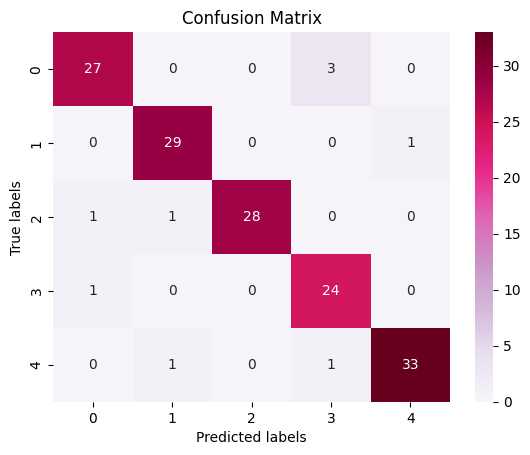

In [14]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 

# Generate Confusion Metrix
cm = confusion_matrix(Y_test_Df,Y_pred_Df)
ax= plt.subplot()
sns.heatmap(cm, cmap='PuRd', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# Set label,title name
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [15]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_Df,Y_pred_Df, target_names=(classes)))

              precision    recall  f1-score   support

      cloudy       0.93      0.90      0.92        30
       foggy       0.94      0.97      0.95        30
       rainy       1.00      0.93      0.97        30
       shine       0.86      0.96      0.91        25
     sunrise       0.97      0.94      0.96        35

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



In [16]:
wrong_predict={}
for i in range(0, Y_test_Df.shape[0]):
    V = list(Y_test_Df[0])
    K = list(Y_pred_Df[0])

    if (V[i] != K[i]):
        wrong_predict.update({i:(V[i],K[i])})

In [17]:
def decode_target_index(index):
    
    label = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
    return label[index]

Text(0.5, 0.98, 'Wrong Prediction')

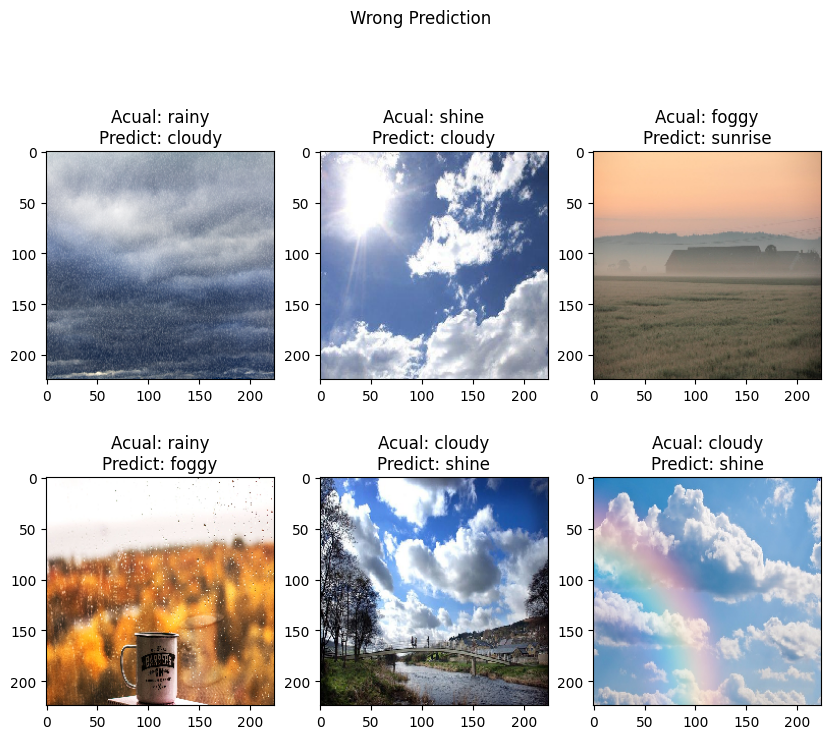

In [18]:
import random

img, result = random.choice(list(wrong_predict.items()))

plt.figure(figsize=(10,12))
display_list = []
while len(display_list)<6:
    img, result = random.choice(list(wrong_predict.items()))
    plt.subplot(3,3,len(display_list)+1)
    if(img not in display_list):
        display_list.append(img)
        plt.imshow(X_test[img])  
        plt.title("Acual: "+decode_target_index(result[0])+"\nPredict: "+decode_target_index(result[1]))

plt.suptitle("Wrong Prediction")